# CreditCard Fraud Detection Support Vector Machines

Data Source: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

# Data Description

There are 25 variables:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv


In [2]:
file_path = "/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv"
#file_path1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_csv(file_path)

df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
df.rename({"default.payment.next.month" : "DEFAULT"}, axis="columns", inplace=True)
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0       0.0       0.0       0.0        1  
1    1000.0       0.0    2000.0        1  
2    1000.0    1000.0    5000.0        0  
3    1100.0    1069.0    1000.0        0  
4    9000.0     689.0     679.0        0  

[5 rows x 25 columns]

In [5]:
df.drop(columns='ID', inplace=True)
df.head(3)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0       0.0       0.0       0.0        1  
1    1000.0       0.0    2000.0        1  
2    1000.0    1000.0    5000.0        0  

[3 rows x 24 columns]

# Statistical Five Number Summary

In [6]:
df.describe().T

count           mean            std       min       25%  \
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  50000.00   
SEX        30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION  30000.0       1.853133       0.790349       0.0      1.00   
MARRIAGE   30000.0       1.551867       0.521970       0.0      1.00   
AGE        30000.0      35.485500       9.217904      21.0     28.00   
PAY_0      30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_2      30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_3      30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_4      30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_5      30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_6      30000.0      -0.291100       1.149988      -2.0     -1.00   
BILL_AMT1  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2  30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT3  30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT4  30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT5  30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT6  30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT1   30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT2   30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT3   30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT4   30000.0    4826.076867   15666.159744       0.0    296.00   
PAY_AMT5   30000.0    4799.387633   15278.305679       0.0    252.50   
PAY_AMT6   30000.0    5215.502567   17777.465775       0.0    117.75   
DEFAULT    30000.0       0.221200       0.415062       0.0      0.00   

                50%        75%        max  
LIMIT_BAL  140000.0  240000.00  1000000.0  
SEX             2.0       2.00        2.0  
EDUCATION       2.0       2.00        6.0  
MARRIAGE        2.0       2.00        3.0  
AGE            34.0      41.00       79.0  
PAY_0           0.0       0.00        8.0  
PAY_2           0.0       0.00        8.0  
PAY_3           0.0       0.00        8.0  
PAY_4           0.0       0.00        8.0  
PAY_5           0.0       0.00        8.0  
PAY_6           0.0       0.00        8.0  
BILL_AMT1   22381.5   67091.00   964511.0  
BILL_AMT2   21200.0   64006.25   983931.0  
BILL_AMT3   20088.5   60164.75  1664089.0  
BILL_AMT4   19052.0   54506.00   891586.0  
BILL_AMT5   18104.5   50190.50   927171.0  
BILL_AMT6   17071.0   49198.25   961664.0  
PAY_AMT1     2100.0    5006.00   873552.0  
PAY_AMT2     2009.0    5000.00  1684259.0  
PAY_AMT3     1800.0    4505.00   896040.0  
PAY_AMT4     1500.0    4013.25   621000.0  
PAY_AMT5     1500.0    4031.50   426529.0  
PAY_AMT6     1500.0    4000.00   528666.0  
DEFAULT         0.0       0.00        1.0

## Identifying Missing Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [8]:
print("Unique values of each column\n")
for cols in ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'DEFAULT']:
    print(cols, " : ", df[cols].unique())

Unique values of each column

SEX  :  [2 1]
EDUCATION  :  [2 1 3 5 4 6 0]
MARRIAGE  :  [1 2 3 0]
AGE  :  [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
DEFAULT  :  [1 0]


In [9]:
len(df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)])

68

In [10]:
len(df)

30000

In [11]:
len(df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)]) / len(df) * 100

0.22666666666666668

Percentage of missing values in 0.23%. Hence, we can remove them from the analysis.

In [12]:
df_msno = df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)]
df_msno.shape

(68, 24)

In [13]:
df =  df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
df.shape

(29932, 24)

In [14]:
df['DEFAULT'].value_counts()

0    23301
1     6631
Name: DEFAULT, dtype: int64

In [15]:
df_default = df[df['DEFAULT']==1]
df_no_default = df[df['DEFAULT']==0]

display(len(df_default), len(df_no_default))

6631

23301

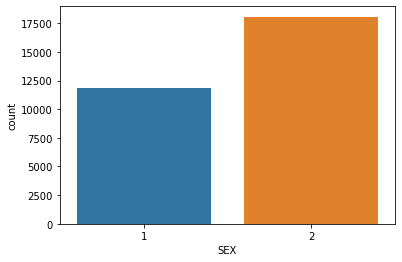

In [16]:
sns.countplot(df['SEX']);

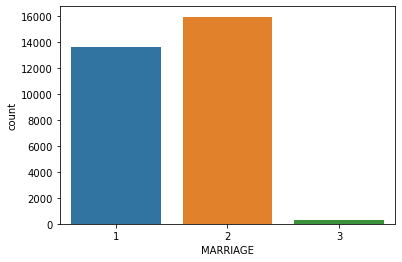

In [17]:
sns.countplot(df['MARRIAGE']);

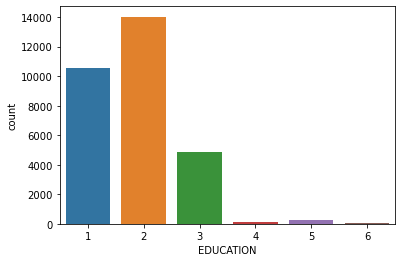

In [18]:
sns.countplot(df['EDUCATION']);

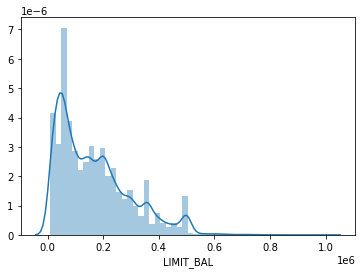

In [19]:
sns.distplot(df['LIMIT_BAL']);

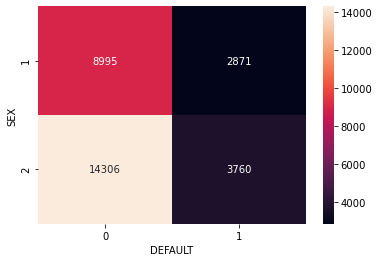

In [20]:
default_by_gender = pd.crosstab(df['SEX'], df['DEFAULT'])
sns.heatmap(default_by_gender, annot=True, fmt='2d');

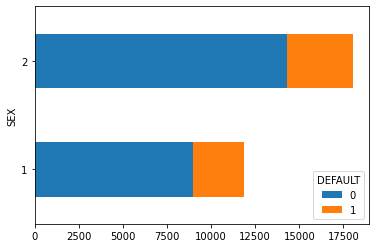

In [21]:
default_by_gender.plot(kind='barh', stacked=True);

# Pairwise Plots of the variables

<Figure size 1296x1296 with 0 Axes>

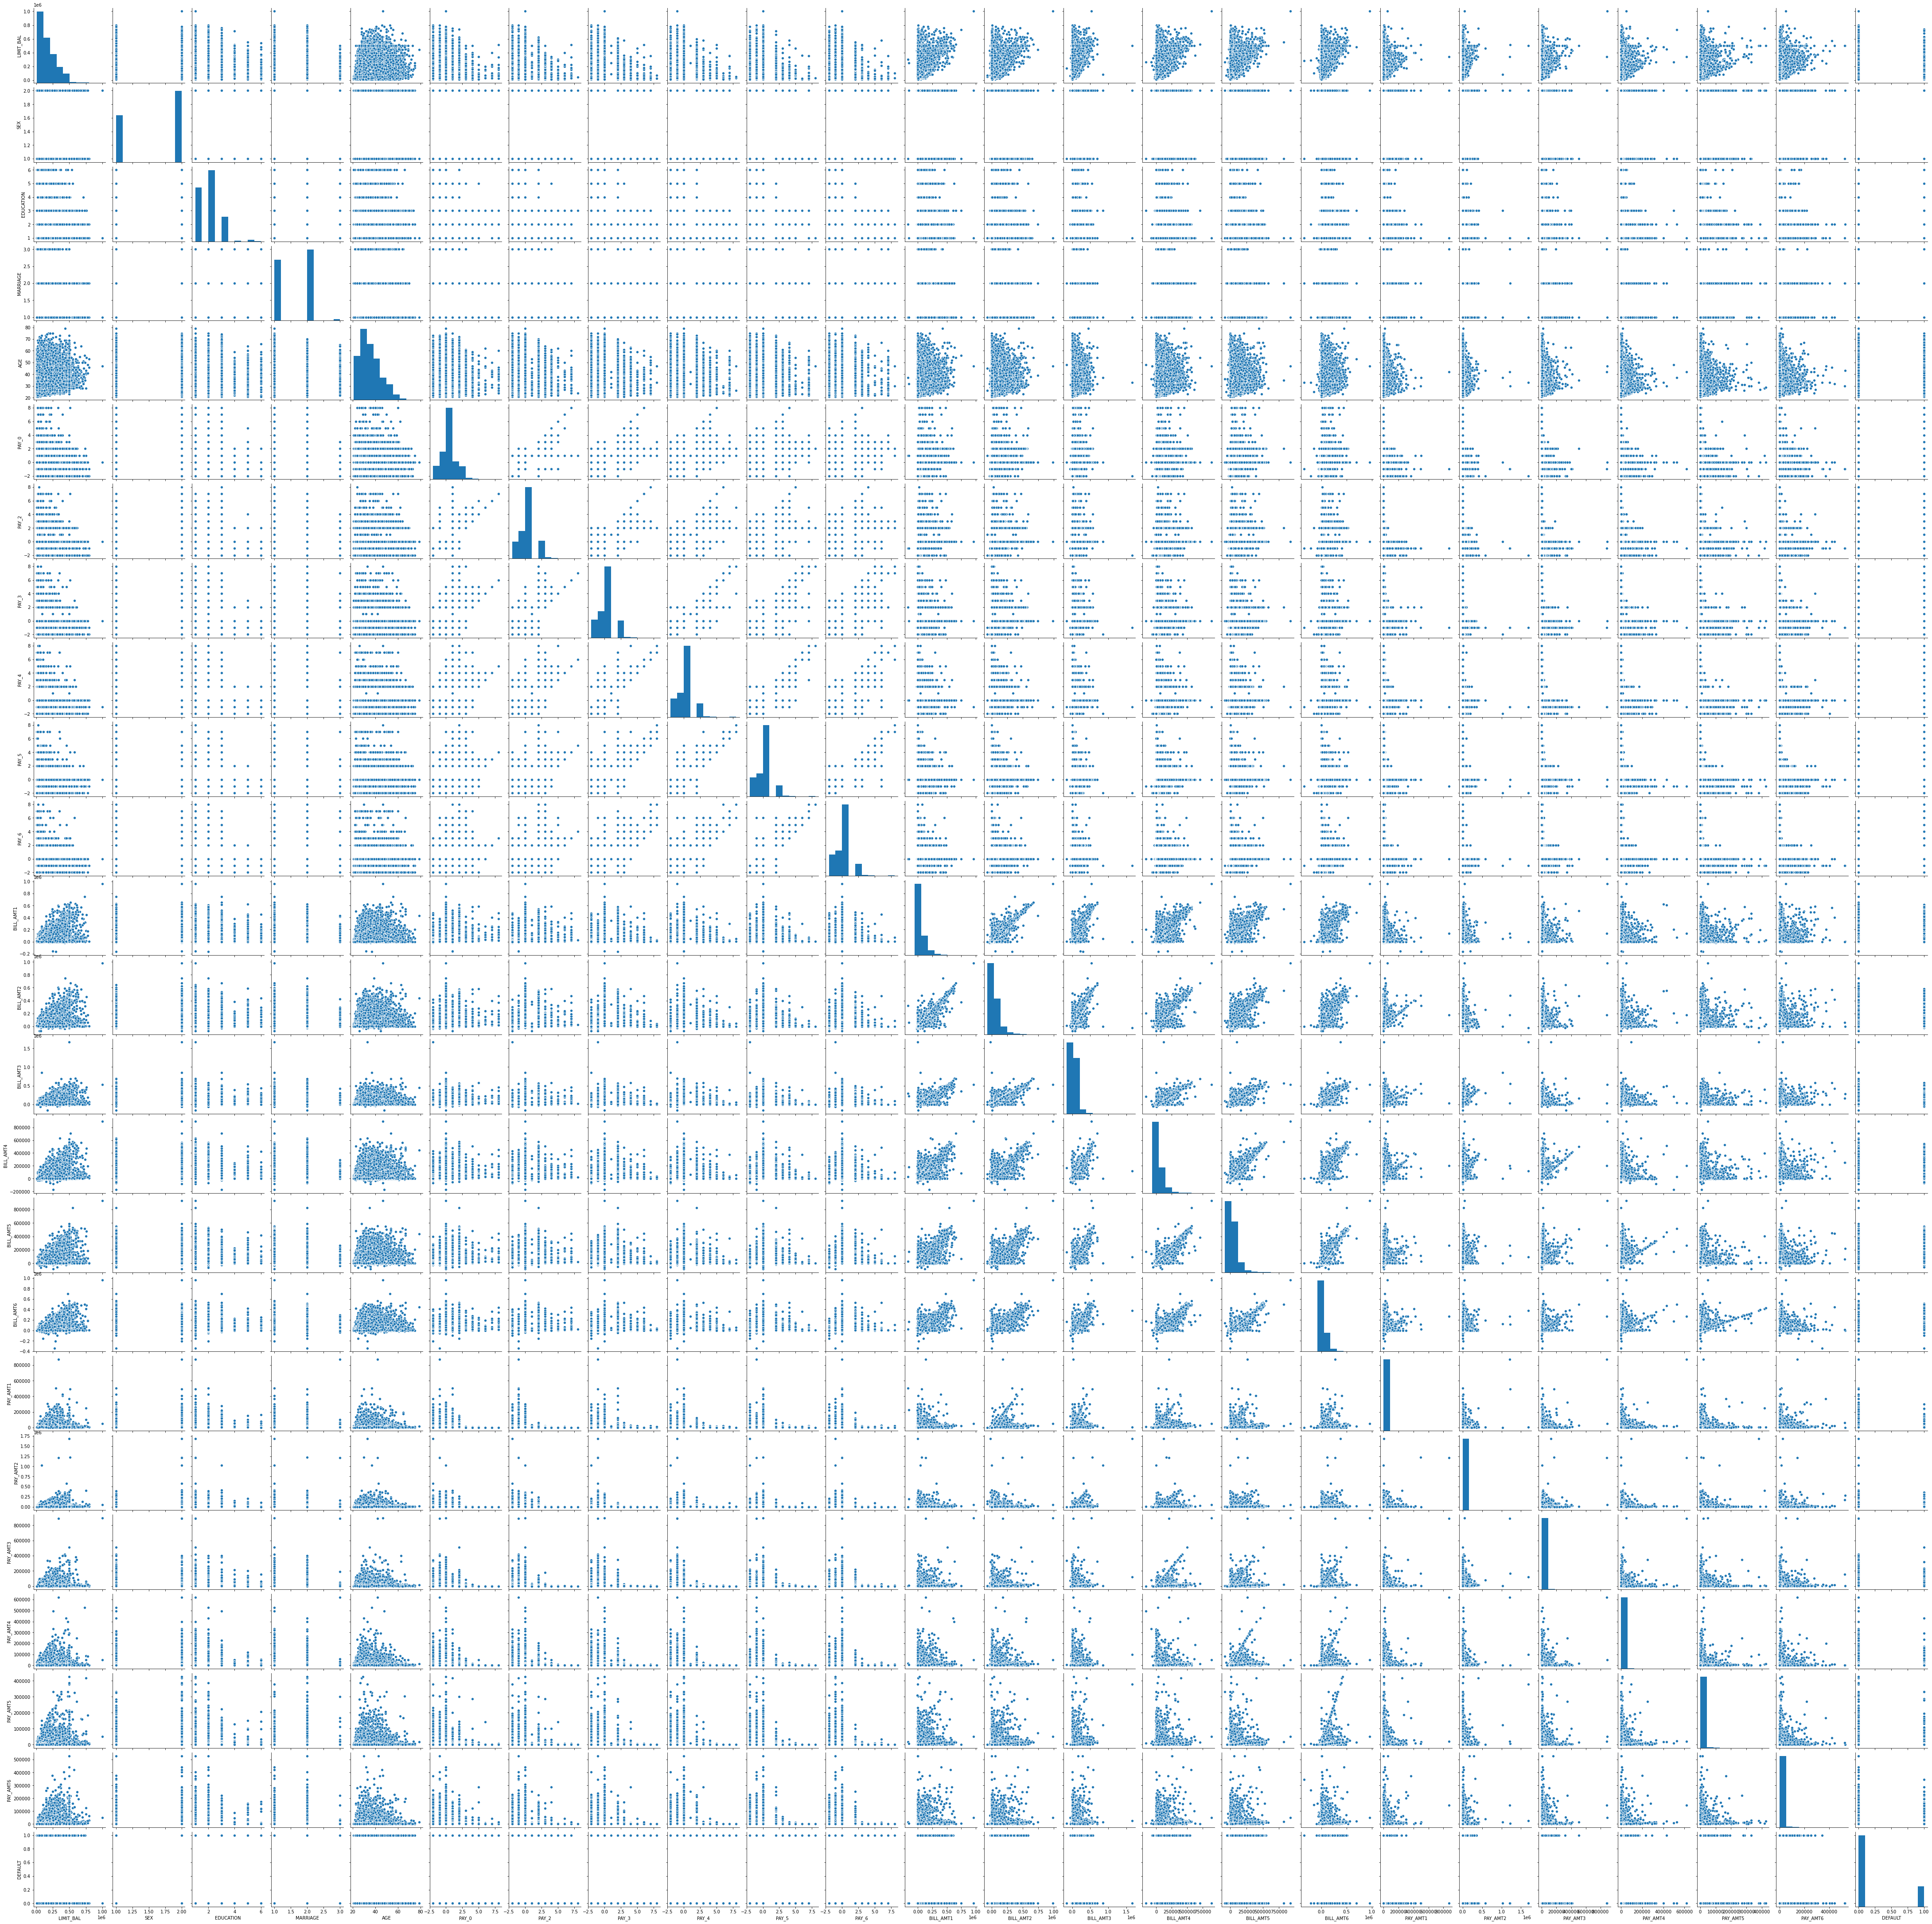

In [22]:
plt.figure(figsize=(18,18))
sns.pairplot(df)
plt.show()

# Correlation Matrix 
#### Multicollinearity detected among the PAY and BILL variables

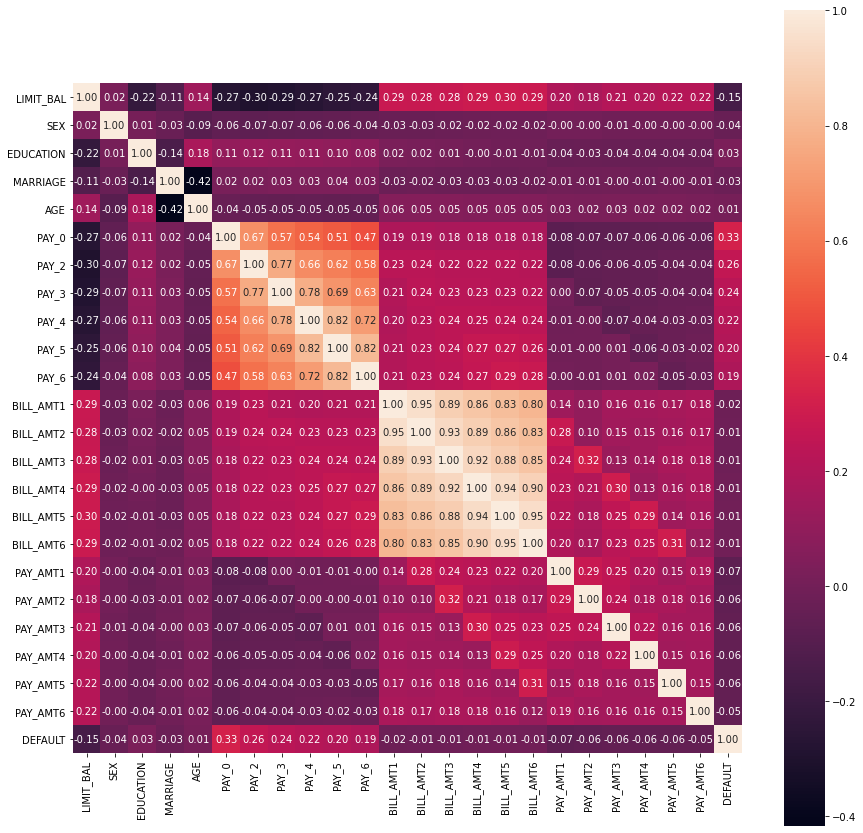

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True)
plt.show()

## Resampling

In [24]:
df_no_default_downsampled = resample(df_no_default,
                                    replace=False,
                                    n_samples=1000,
                                    random_state=24)
len(df_no_default_downsampled)

1000

In [25]:
df_default_downsampled = resample(df_default,
                                    replace=False,
                                    n_samples=1000,
                                    random_state=24)
len(df_default_downsampled)

1000

In [26]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

# Separating the Independent and Dependent Variables

In [27]:
X = df_downsample.drop(columns='DEFAULT', axis=1).copy()
X.shape

(2000, 23)

In [28]:
y = df_downsample['DEFAULT'].copy()
y.shape

(2000,)

# One-Hot Encoding for Categorical Variables

In [29]:
X_encoded = pd.get_dummies(X, columns=['SEX','MARRIAGE','EDUCATION','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
X_encoded.head()

LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
21906   330000.0   27        0.0        0.0        0.0        0.0        0.0   
358     110000.0   24    83755.0    77431.0    79044.0    80631.0    82333.0   
1648    240000.0   39        0.0     1234.0        0.0        0.0      620.0   
13324    80000.0   28     4280.0     2800.0        0.0        0.0        0.0   
6978    170000.0   30      998.0      998.0        0.0      499.0      724.0   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_-2  PAY_6_-1  PAY_6_0  \
21906     2234.0       0.0       0.0  ...         0         1        0   
358      84462.0    3000.0    2900.0  ...         0         0        1   
1648         0.0    1234.0       0.0  ...         1         0        0   
13324        0.0    2800.0       0.0  ...         1         0        0   
6978       390.0       0.0       0.0  ...         0         1        0   

       PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
21906        0        0        0        0        0        0        0  
358          0        0        0        0        0        0        0  
1648         0        0        0        0        0        0        0  
13324        0        0        0        0        0        0        0  
6978         0        0        0        0        0        0        0  

[5 rows x 84 columns]

In [30]:
X_encoded.shape

(2000, 84)

# Split into Train and Test sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=24)

In [32]:
X_train.head(3)

LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
10876   300000.0   36      -78.0      -78.0      -78.0     1222.0     1072.0   
25426   100000.0   26    88728.0    86405.0    88636.0    83516.0    39871.0   
17025    30000.0   22    27201.0    27873.0    25406.0    23339.0    17869.0   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_-2  PAY_6_-1  PAY_6_0  \
10876     4689.0       0.0       0.0  ...         0         1        0   
25426    39626.0       0.0    3639.0  ...         0         0        1   
17025    15284.0    4000.0       0.0  ...         0         0        1   

       PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
10876        0        0        0        0        0        0        0  
25426        0        0        0        0        0        0        0  
17025        0        0        0        0        0        0        0  

[3 rows x 84 columns]

In [33]:
X_test.head(3)

LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
18026   180000.0   38   114091.0   124233.0   125768.0   126202.0   127677.0   
8817     60000.0   24      836.0      390.0      317.0      -73.0     -463.0   
20741    50000.0   44     1473.0     2423.0      950.0     1560.0     1170.0   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_-2  PAY_6_-1  PAY_6_0  \
18026    99764.0   12100.0    5000.0  ...         0         0        1   
8817      7942.0     390.0     317.0  ...         0         1        0   
20741      780.0    2423.0       0.0  ...         0         0        1   

       PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
18026        0        0        0        0        0        0        0  
8817         0        0        0        0        0        0        0  
20741        0        0        0        0        0        0        0  

[3 rows x 84 columns]

# Standard Scaling for using Radial Basis Function Kernel

In [34]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# Build SVC using RBF Kernel

In [35]:
clf_svc = SVC(C=1.0,
              kernel='rbf',
             gamma='auto',
             probability=True)

In [36]:
clf_svc.fit(X_train_scaled, y_train)

SVC(gamma='auto', probability=True)

In [37]:
y_pred = clf_svc.predict(X_test_scaled)

In [38]:
print("Classification Report : \n")
print(classification_report(y_pred, y_test))

Classification Report : 

              precision    recall  f1-score   support

           0       0.81      0.62      0.70       376
           1       0.54      0.75      0.63       224

    accuracy                           0.67       600
   macro avg       0.67      0.69      0.67       600
weighted avg       0.71      0.67      0.68       600



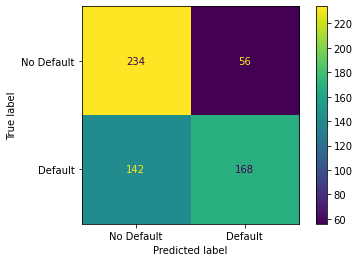

In [39]:
plot_confusion_matrix(clf_svc,
                     X_test_scaled,
                     y_test,
                     values_format='d',
                     display_labels=['No Default','Default'])

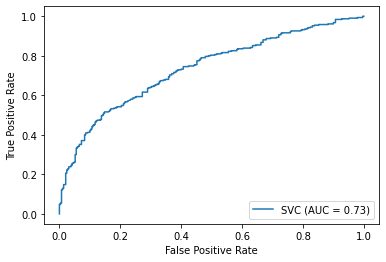

In [40]:
plot_roc_curve(clf_svc,
               X_test_scaled,
               y_test)

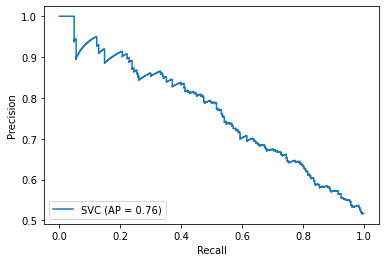

In [41]:
plot_precision_recall_curve(clf_svc,
                            X_test_scaled,
                            y_test)

# Hyperparameter Tuning with GridSearchCV

In [42]:
param_grid = [{
    'C' : [0.5, 1.0, 10, 100],
    'gamma' : ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['rbf']
}]

In [43]:
clf_svc_tuned = GridSearchCV(SVC(),
                             param_grid,
                             cv=5,
                             scoring='accuracy',
                             verbose=2
)

In [44]:
clf_svc_tuned.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.5, gamma=scale, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   28.6s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1.0, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=2)

In [45]:
clf_svc_tuned.best_estimator_

SVC(C=0.5)

In [46]:
clf_svc_tuned.best_params_

{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}

In [47]:
y_pred_tuned = clf_svc_tuned.predict(X_test_scaled)

In [48]:
print("Classification Report : \n")
print(classification_report(y_pred_tuned, y_test))

Classification Report : 

              precision    recall  f1-score   support

           0       0.82      0.62      0.70       384
           1       0.53      0.75      0.62       216

    accuracy                           0.67       600
   macro avg       0.67      0.69      0.66       600
weighted avg       0.71      0.67      0.67       600



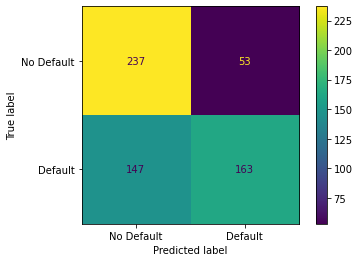

In [49]:
plot_confusion_matrix(clf_svc_tuned,
                     X_test_scaled,
                     y_test,
                     values_format='d',
                     display_labels=['No Default','Default'])

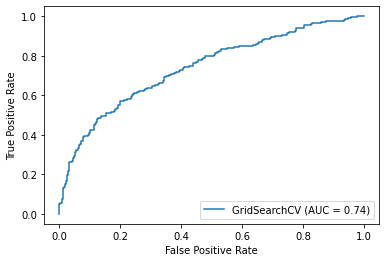

In [50]:
plot_roc_curve(clf_svc_tuned,
               X_test_scaled,
               y_test)

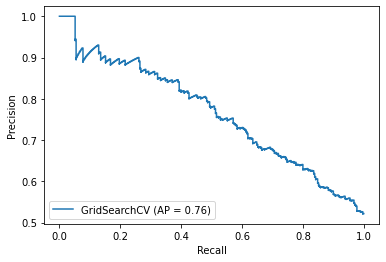

In [51]:
plot_precision_recall_curve(clf_svc_tuned,
                            X_test_scaled,
                            y_test)

# Plotting the Decision Boundary of SVC

In [52]:
pca = PCA()

In [53]:
X_train_pca = pca.fit_transform(X_train_scaled)

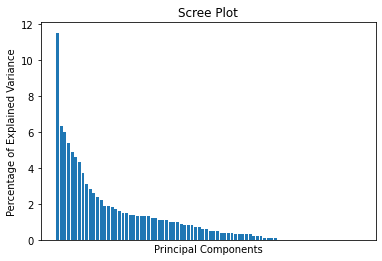

In [54]:
pvar = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(pvar)+1)]

plt.bar(x=range(1, len(pvar)+1), height=pvar)
plt.tick_params(axis='x',
               which='both',
               bottom=False,
               top=False,
               labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [55]:
train_pc1_coords = X_train_pca[:,0]
train_pc2_coords = X_train_pca[:,1]

pca_train_scaled = np.column_stack((train_pc1_coords, train_pc2_coords))

In [56]:
clf_svc_tuned.fit(pca_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.1s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.5, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    7.8s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1.0, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=2)

In [57]:
X_test_pca = pca.transform(X_train_scaled)

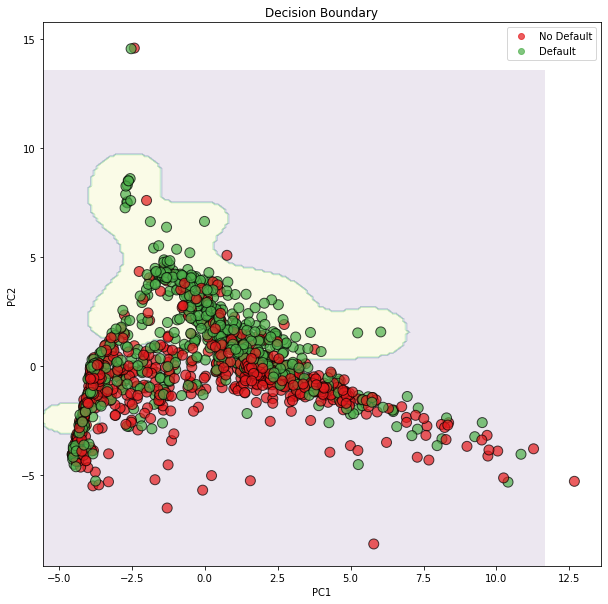

In [58]:
test_pc1_coords = X_test_pca[:,0]
test_pc2_coords = X_test_pca[:,1]

pca_test_scaled = np.column_stack((train_pc1_coords, train_pc2_coords))

x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() - 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() - 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

Z = clf_svc_tuned.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(xx, yy, Z, alpha=0.1)

cmap = colors.ListedColormap(['#e41a1c','#4daf4a'])

scatter = ax.scatter(test_pc1_coords,
                     test_pc2_coords,
                     c=y_train,
                     cmap=cmap,
                     s=100,
                     edgecolors='k',
                     alpha=0.7)

legend = ax.legend(scatter.legend_elements()[0],
                   scatter.legend_elements()[1],
                   loc='upper right')

legend.get_texts()[0].set_text('No Default')
legend.get_texts()[1].set_text('Default')

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision Boundary')

plt.show()